## Observations and Insights 

In [1]:
%matplotlib notebook

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
# Set data file location
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
Mouse_Clinical_Combine = pd.merge(mouse_metadata, study_results, how='inner', on="Mouse ID")

# Display the data table for preview
Mouse_Clinical_Combine

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice.
Mice_Number = Mouse_Clinical_Combine["Mouse ID"].value_counts()
#Display number of mouse using len()
len(Mice_Number)


249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Get duplicate mouse using .duplicated function
Duplicate_Mice = Mouse_Clinical_Combine.loc[Mouse_Clinical_Combine.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
Duplicate_Mice

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
# Dispaly duplicated by filtering Mouse ID
Duplicate_Mouse=Mouse_Clinical_Combine.loc[Mouse_Clinical_Combine["Mouse ID"] == "g989"]
Duplicate_Mouse


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Dropping the duplicate mouse by its ID
Clean_Dataframe=Mouse_Clinical_Combine[Mouse_Clinical_Combine['Mouse ID'].isin(Duplicate_Mice)==False]
Clean_DF=Clean_Dataframe.drop_duplicates(subset = ["Mouse ID"])
Clean_DF

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [7]:
# Checking the number of mice in the clean DataFrame.
# Output number of mouse using len() from the clean DataFrame 
Clean_Mouse = Clean_Dataframe["Mouse ID"].value_counts()
len(Clean_Mouse)



248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Create summary statistics table as required 
mean = Clean_Dataframe.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = Clean_Dataframe.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = Clean_Dataframe.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
standard_dv = Clean_Dataframe.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = Clean_Dataframe.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
mean = Clean_Dataframe.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = Clean_Dataframe.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = Clean_Dataframe.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
standard_dv = Clean_Dataframe.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = Clean_Dataframe.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

# This method is the most straighforward, creating multiple series and putting them all together at the end.
# Format and output summary statistics table from above
Summary_Stat = pd.DataFrame({"Mean Tumor Volume": mean, "Median Tumor Volume": median, "Tumor Volume Variance": variance, "Tumor Volume Std. Dev.": standard_dv, "Tumor Volume Std. Err.": sem})
Summary_Stat


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Create summary statistics table as required but now using .agg() 
Groupby_Function = Clean_Dataframe.groupby('Drug Regimen').agg(Tumor_Vol_Mean=('Tumor Volume (mm3)', np.mean),
                                                   Tumor_Vol_Median=('Tumor Volume (mm3)', np.median),
                                                   Tumor_Vol_Var=('Tumor Volume (mm3)', np.var),
                                                   Tumor_Vol_Stdev=('Tumor Volume (mm3)', np.std),
                                                   Tumor_Vol_SEM=('Tumor Volume (mm3)', st.sem))

# This method produces everything in a single groupby function
# Display output
Groupby_Function

,Tumor_Vol_Mean,Tumor_Vol_Median,Tumor_Vol_Var,Tumor_Vol_Stdev,Tumor_Vol_SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<IPython.core.display.Javascript object>


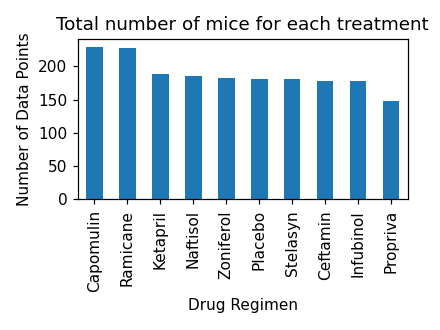

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
# Plot bar chart from Clean_Dataframe using pandas
Drug_Group = Clean_Dataframe['Drug Regimen'].value_counts()

# Bar chart properties
plt.figure(1,figsize=(4,3))
Pandas_Bar = Drug_Group.plot(kind="bar",title="Total number of mice for each treatment")
Pandas_Bar.set_xlabel("Drug Regimen")
Pandas_Bar.set_ylabel("Number of Data Points")
plt.figure(1)
plt.show()
plt.tight_layout()

<IPython.core.display.Javascript object>


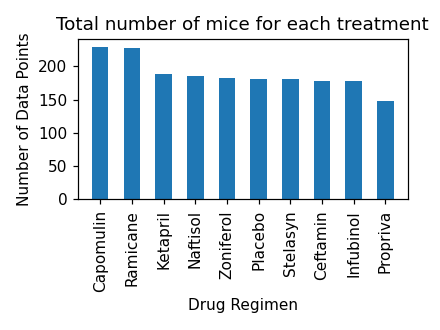

In [11]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
# Plot bar chart from Clean_Dataframe using pyplot
x_axis = np.arange(len(Drug_Group))
tick_locations = [value for value in x_axis]

# Bar chart properties
plt.figure(2,figsize=(4,3))
plt.bar(x_axis, Drug_Group, align="center", width = 0.52)
plt.xticks(tick_locations, list(Drug_Group.index), rotation="vertical")

plt.xlim(-0.7, len(x_axis)-0.3)
plt.ylim(0, max(Drug_Group)*1.05)

plt.title('Total number of mice for each treatment')
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")

plt.show()
plt.tight_layout()

<IPython.core.display.Javascript object>


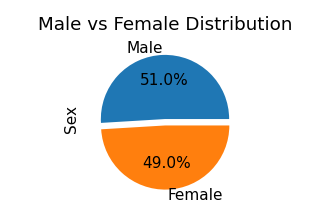

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# Plot pie chart of gender distribution from Clean_Dataframe using pandas
Drug_Pie = Clean_Dataframe.Sex.value_counts()

# Pie chart properties
plt.figure(3,figsize=(3,2))
explode = (0,0.1)
Pandas_Pie = Drug_Pie.plot(kind='pie',explode=explode,y='Sex',autopct='%.0f.0%%', title='Male vs Female Distribution')
plt.show()
plt.tight_layout()


<IPython.core.display.Javascript object>


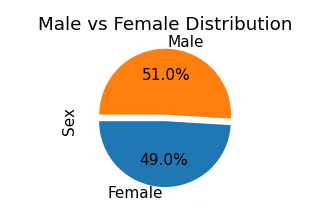

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Plot pie chart of gender distribution from Clean_Dataframe using pyplot
Gender_Group = Clean_Dataframe.groupby('Sex')
Gender_Group_Count = pd.DataFrame(Gender_Group['Sex'].count())
genders = list(Gender_Group_Count.index.values)
Matpotlib_Pie = Gender_Group_Count['Sex']

# Pie chart properties
plt.figure(4,figsize=(3,2))
explode = (0,0.1)
plt.pie(Matpotlib_Pie, explode=explode,labels=genders, autopct='%.0f.0%%', startangle=180)
plt.ylabel("Sex")
plt.title('Male vs Female Distribution')
plt.show()
plt.tight_layout()


## Quartiles, Outliers and Boxplots

In [14]:
#Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse

# Get greatest timepoint
Gretest_Timepoint = Clean_Dataframe.groupby("Mouse ID").max()["Timepoint"]

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
# Merge Gretest_Timepoint with Clean_Dataframe using pd.merge 
Tumor_Last_Point = pd.merge(Gretest_Timepoint, Clean_Dataframe, on=["Mouse ID", "Timepoint"], how="left")


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
# Set treatment into a list
regimen= ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
# Empty list for data storage
Tumor_Volume=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Set values for calculation
Quantiles_Val=[.25, .5, .75]

# Use for loop to do calculation
for Each_Drug in regimen:
    filter_DF = Tumor_Last_Point.loc[:, "Drug Regimen"]==Each_Drug
    one_drugTV = Tumor_Last_Point.loc[filter_DF, "Tumor Volume (mm3)"]
    Tumor_Volume.append(Tumor_Last_Point.loc[filter_DF, "Tumor Volume (mm3)"])
    quartiles = one_drugTV.quantile(Quantiles_Val)
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # Determine outliers using upper and lower bounds
    # Setting upper and lower bound for outliers filter
    lowerq = quartiles.loc[.25]
    upperq = quartiles.loc[.75]
    iqr = upperq - lowerq
    lower_bound = lowerq-(1.5*iqr)
    upper_bound = upperq+(1.5*iqr)
    
    # Do the calculations to look for outlier
    drug_filter = (one_drugTV>upper_bound) | (one_drugTV<lower_bound)
    
    # Output of potential outlier
    outlier_count = one_drugTV.loc[drug_filter]
    print(f"There are {outlier_count} outliers for {Each_Drug}.")

There are Series([], Name: Tumor Volume (mm3), dtype: float64) outliers for Capomulin.
There are Series([], Name: Tumor Volume (mm3), dtype: float64) outliers for Ramicane.
There are 31    36.321346
Name: Tumor Volume (mm3), dtype: float64 outliers for Infubinol.
There are Series([], Name: Tumor Volume (mm3), dtype: float64) outliers for Ceftamin.


<IPython.core.display.Javascript object>


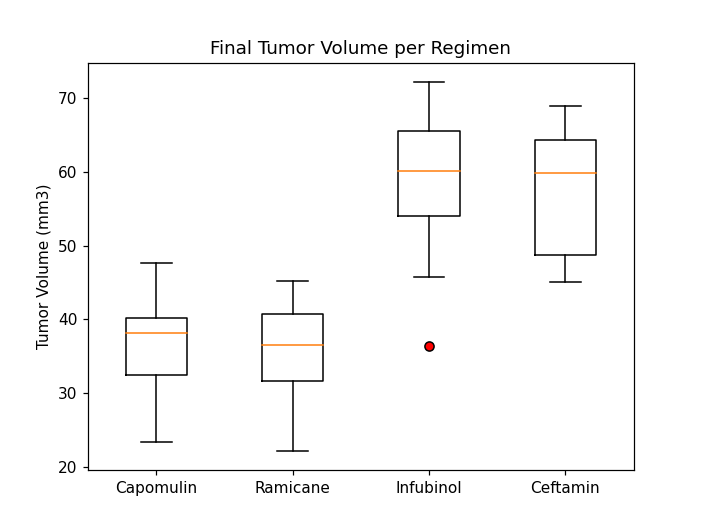

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
Final_Tumor = dict(markerfacecolor='r', marker='o')

figure5, ab = plt.subplots()
ab.set_title('Final Tumor Volume per Regimen')
ab.set_xticklabels(regimen)
ab.boxplot(Tumor_Volume, flierprops=Final_Tumor)
ab.set_ylabel('Tumor Volume (mm3)')

plt.show()

## Line and Scatter Plots

<IPython.core.display.Javascript object>


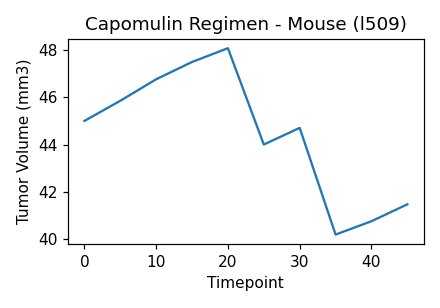

In [17]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
# line plot data for mouse treated with capomulin
Mouse_Treated = Clean_Dataframe[['Timepoint', 'Tumor Volume (mm3)']].loc[(Clean_Dataframe['Drug Regimen'] == 'Capomulin') & (Clean_Dataframe['Mouse ID']=='l509')]

# Line chart properties
plt.figure(6,figsize=(4,2.8))
plt.plot(Mouse_Treated['Timepoint'], Mouse_Treated['Tumor Volume (mm3)'])
plt.title("Capomulin Regimen - Mouse (l509)")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint")
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


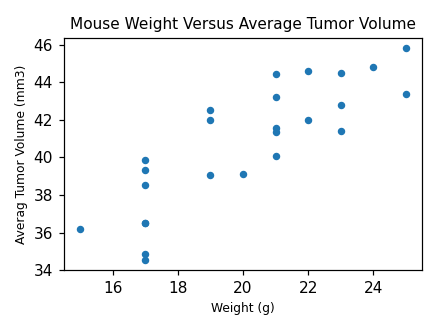

In [18]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
# Scatter plot data source
Capomulin_Regimen = Clean_Dataframe.loc[Clean_Dataframe["Drug Regimen"] == "Capomulin",:]

# Scatter plot properties
fig7, ac = plt.subplots(figsize=(4, 3))
Capomulin_Volume =Capomulin_Regimen.groupby(['Mouse ID']).mean()
Capomulin_W = Capomulin_Volume['Weight (g)']
Capomulin_V = Capomulin_Volume['Tumor Volume (mm3)']
plt.scatter(Capomulin_W,Capomulin_V,s=15)
plt.title('Mouse Weight Versus Average Tumor Volume',fontsize =10)
plt.xlabel('Weight (g)',fontsize =8)
plt.ylabel('Averag Tumor Volume (mm3)',fontsize =8)
plt.tight_layout()
plt.show()

## Correlation and Regression

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Correlation calculation using st.pearsonr
correlation = st.pearsonr(Capomulin_W,Capomulin_V)
print(f'The correlation between Average Tumor Volume and Mouse Weight is {round(correlation[0],2)}')


The correlation between Average Tumor Volume and Mouse Weight is 0.84


<IPython.core.display.Javascript object>


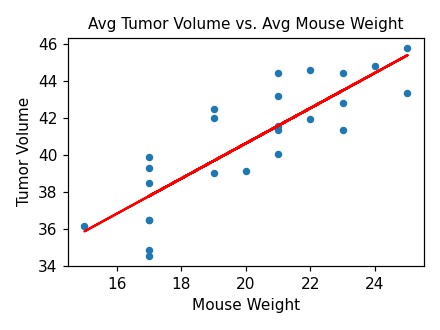

In [20]:
# linregress data source
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(Capomulin_W,Capomulin_V)
line_eq = ''

# Scatter plot properties
fig8, ad = plt.subplots(figsize=(4, 3))
plt.scatter(Capomulin_W,Capomulin_V,s=15)
plt.title('Avg Tumor Volume vs. Avg Mouse Weight',fontsize =10)
plt.xlabel('Mouse Weight')
plt.ylabel('Tumor Volume')
plt.tight_layout()
plt.show()

# linregress intercept properties
reg_values = Capomulin_W * slope + intercept
plt.plot(Capomulin_W, reg_values, "r-")
plt.annotate(line_eq,(19.95,38),fontsize=15,color="red")
plt.tight_layout()
plt.show()